# Проанализировать ВВП африканской страны Гана

In [16]:
from arch import arch_model
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.graphics.tsaplots as sgt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
!pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_csv('ghana_gdp.csv', parse_dates=["year"], index_col = ["year"])
data.head()

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


In [8]:
data.index.min()

Timestamp('1960-01-01 00:00:00')

<AxesSubplot: xlabel='year'>

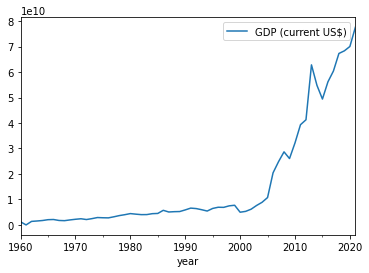

In [5]:
%matplotlib inline 
data.plot()

In [9]:
train_df = data.loc[:"2016-12-31"]
test_df = data.loc["2017-01-01":]
train_df.shape, test_df.shape

((57, 1), (5, 1))

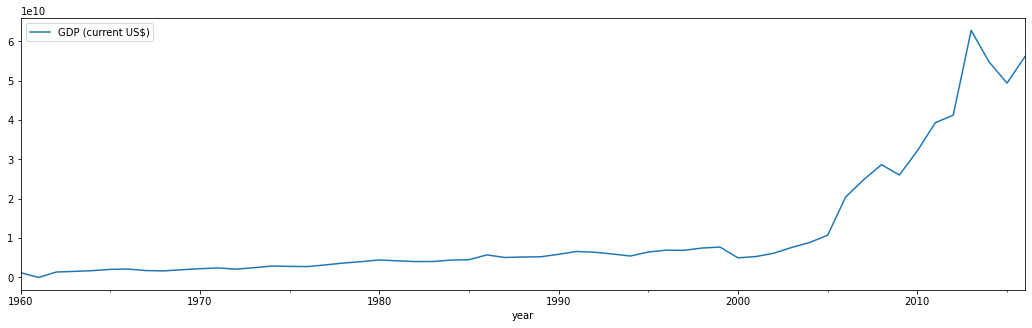

In [24]:
train_df.plot()
plt.show()

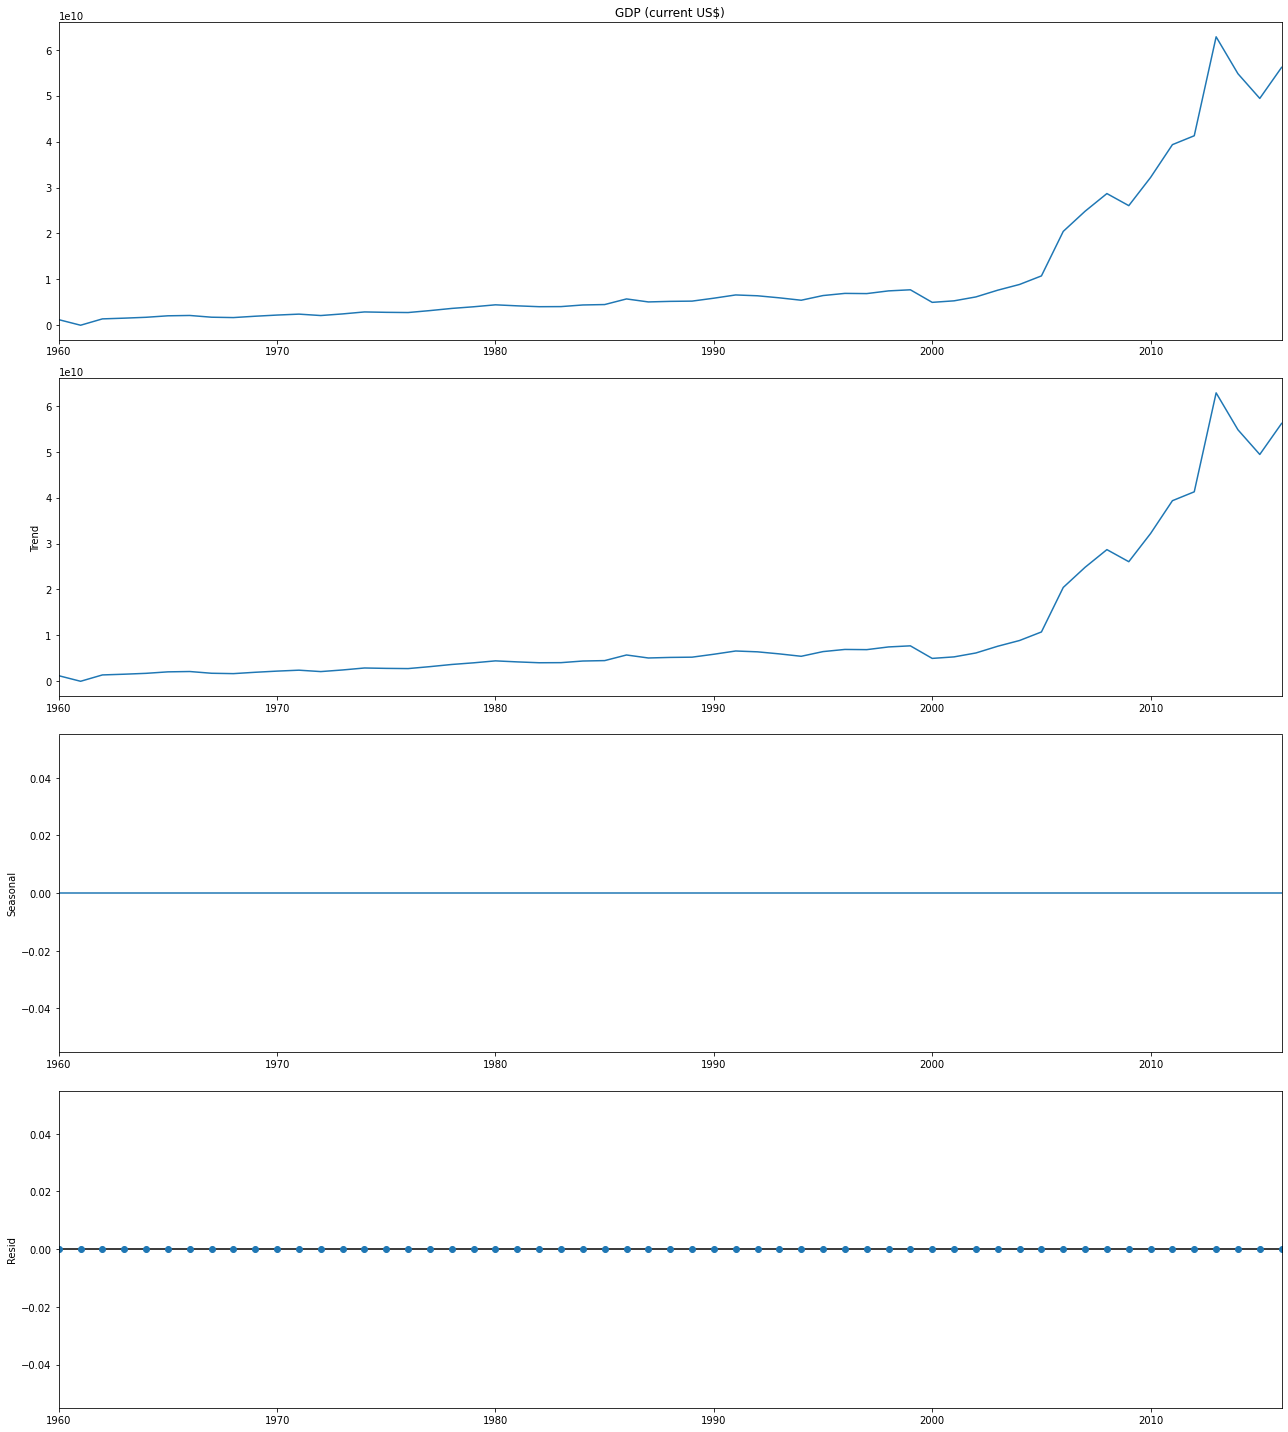

In [17]:
plt.rcParams["figure.figsize"] = 18, 20

result = seasonal_decompose(train_df["GDP (current US$)"], model='additive')
result.plot()
plt.show()

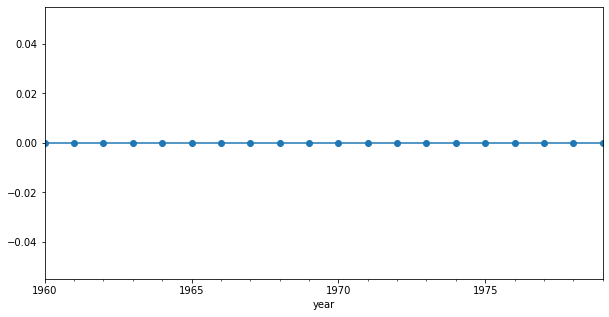

In [25]:
plt.rcParams["figure.figsize"] = 10, 5
result.seasonal[:20].plot(marker = "o")
plt.show()

- отсутствуют шумы в данных и сезонность.

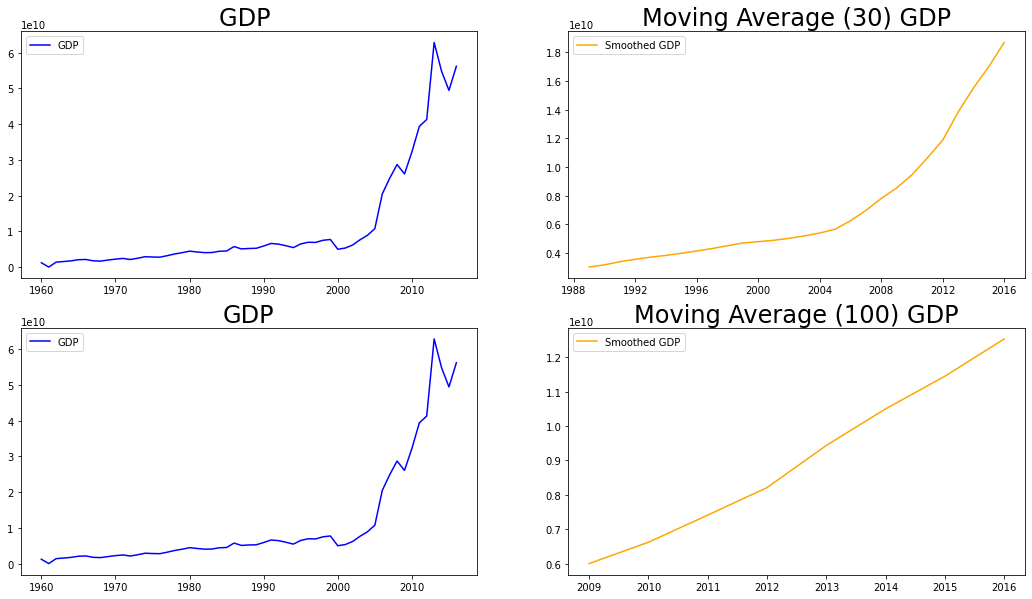

In [33]:
plt.rcParams["figure.figsize"] = 18, 10

fig, ax = plt.subplots(2, 2)

# Окно в месяц (Window = 30) 
ax[0, 0].plot(train_df["GDP (current US$)"], color = "blue", label = "GDP")
ax[0, 0].set_title("GDP ", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df["GDP (current US$)"].rolling(window=30).mean(), color = "orange", label = "Smoothed GDP")
ax[0, 1].set_title("Moving Average (30) GDP", size = 24)
ax[0, 1].legend()


# Окно в год (Window = 100)
ax[1, 0].plot(train_df["GDP (current US$)"], color = "blue", label = "GDP")
ax[1, 0].set_title("GDP", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df["GDP (current US$)"].rolling(window=50).mean(), color = "orange", label = "Smoothed GDP")
ax[1, 1].set_title("Moving Average (100) GDP", size = 24)
ax[1, 1].legend()

Скользящие середнее хорошо помогает определение тренда.

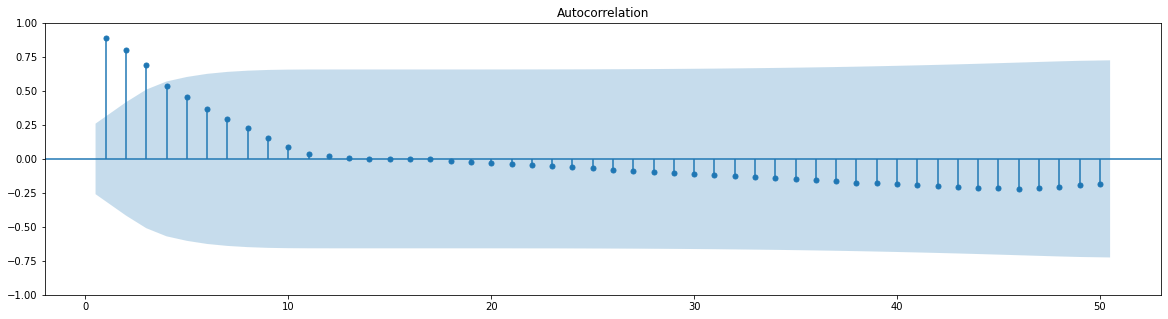

In [36]:
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_acf(train_df["GDP (current US$)"], zero = False, lags = 50)
plt.show()

С начала периода сохрянялась положительная корреляция, а к конце стало отрицательной.

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


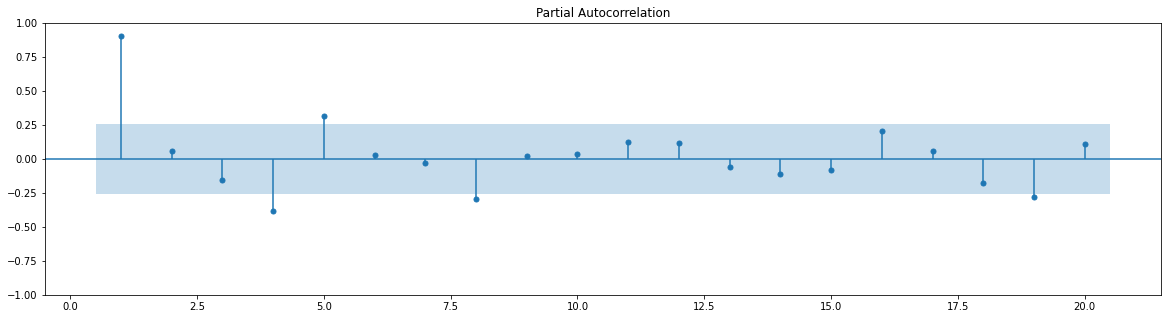

In [37]:
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df["GDP (current US$)"], zero = False, lags = 20)
plt.show()

Эти графики показывают, как данные коррелируют с запаздывающей версией самих себя.
В отличие от того, что предлагали графики ACF, GPT с лагом не приносят никакой новой информации. В таких ситуация параметр p выбирается =1

In [38]:
adfuller(train_df["GDP (current US$)"])

(1.3717683021093658,
 0.9969820388766343,
 8,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 2097.2790607233737)

Статистика теста больше всех критических значений, поэтому нулевую гипотезу ($H_0$) нельзя отвергнуть.

Поэтому ВВП не являются стационарными

In [79]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, ax=axes[0], lags=10)
    sgt.plot_pacf(series, ax=axes[1], lags=10, method="ywm")
    plt.show()

## Дифференцирование ряда

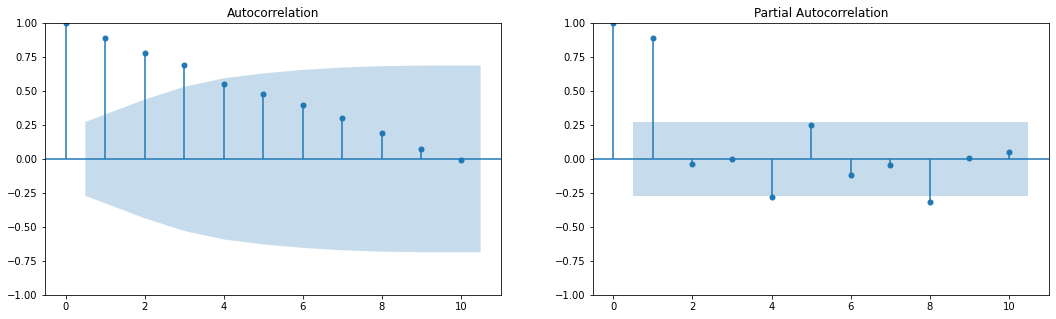

(-2.8491640302176915,
 0.05158694440449975,
 9,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 1873.9365541437817)

In [82]:
plot_acf_pacf(train_df["GDP (current US$)"].diff(5).dropna())
adfuller(train_df["GDP (current US$)"].diff(5).dropna())

In [85]:
arima_model = ARIMA(train_df["GDP (current US$)"].dropna(), order = (1, 1, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   57
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1316.349
Date:                Fri, 24 Feb 2023   AIC                           2638.698
Time:                        18:15:12   BIC                           2644.774
Sample:                    01-01-1960   HQIC                          2641.053
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0787      4.016     -0.020      0.984      -7.950       7.793
ma.L1          0.0602      4.011      0.015      0.988      -7.802       7.922
sigma2      1.497e+19   9.05e-19   1.65e+37      0.000     1.5e+19     1.5e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               549.13
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):             178.07   Skew:                             2.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+53. Standard errors may be unstable.
"""

In [84]:
model = SARIMAX(train_df["GDP (current US$)"].dropna(), order = (1, 1, 1))
model_fit = model.fit()
model_fit.summary()

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   57
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1316.349
Date:                Fri, 24 Feb 2023   AIC                           2638.698
Time:                        18:13:08   BIC                           2644.774
Sample:                    01-01-1960   HQIC                          2641.053
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0787      4.016     -0.020      0.984      -7.950       7.793
ma.L1          0.0602      4.011      0.015      0.988      -7.802       7.922
sigma2      1.497e+19   9.05e-19   1.65e+37      0.000     1.5e+19     1.5e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               549.13
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):             178.07   Skew:                             2.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+53. Standard errors may be unstable.
"""

In [72]:
seas_model = SARIMAX(train_df["GDP (current US$)"].dropna(), order = (1, 1, 2), seasonal_order = (1, 1, 2, 1))
seas_model_fit = seas_model.fit()
seas_model_fit.summary()

c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\askar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                 GDP (current US$)   No. Observations:                   57
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 5)   Log Likelihood               -1189.832
Date:                           Fri, 24 Feb 2023   AIC                           2393.664
Time:                                   18:01:03   BIC                           2407.187
Sample:                               01-01-1960   HQIC                          2398.832
                                    - 01-01-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3211      0.364     -0.881      0.378      -1.035       0.393
ma.L1          0.4182      0.413      1.013      0.311      -0.391       1.227
ma.L2         -0.3984      0.174     -2.288      0.022      -0.740      -0.057
ar.S.L5        0.0375      3.280      0.011      0.991      -6.392       6.467
ma.S.L5        0.0826      3.356      0.025      0.980      -6.495       6.660
ma.S.L10      -0.2433      0.889     -0.274      0.784      -1.985       1.499
sigma2      1.331e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                84.13
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              26.03   Skew:                             1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.95e+51. Standard errors may be unstable.
"""

In [90]:
pred_df = pd.DataFrame(index=data.index)

pred_df["model_preds"] = seas_model_fit.predict(
    start=test_df.index[0], end=test_df.index[-1]
)


pred_df["spx"] = data["GDP (current US$)"]

forecast = seas_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha=0.05)  # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower spx"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper spx"]

KeyError: 'lower spx'